<a href="https://colab.research.google.com/github/Nuchaila/LSTM/blob/main/Project_EEMD_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install EMD-signal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats

In [ ]:
from math import sqrt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from pandas.plotting import lag_plot
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib as mpl
import tensorflow as tf
import random

mpl.rcParams['figure.figsize'] = (7,4)
mpl.rcParams['axes.grid'] = False

array([<Axes: xlabel='Date'>], dtype=object)

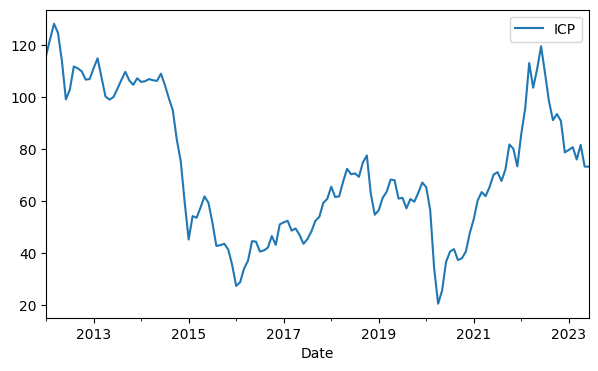

In [ ]:
data = pd.read_csv('MINYAK.csv')
data['Date'] = pd. to_datetime(data['Date'], infer_datetime_format=True)
data.set_index('Date')[['ICP']].plot(subplots=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    138 non-null    datetime64[ns]
 1   ICP     138 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 KB


In [ ]:
data_input = data[['ICP']]

In [ ]:
# Training & Testing
train = data.iloc[:111]
test = data.iloc[111:]

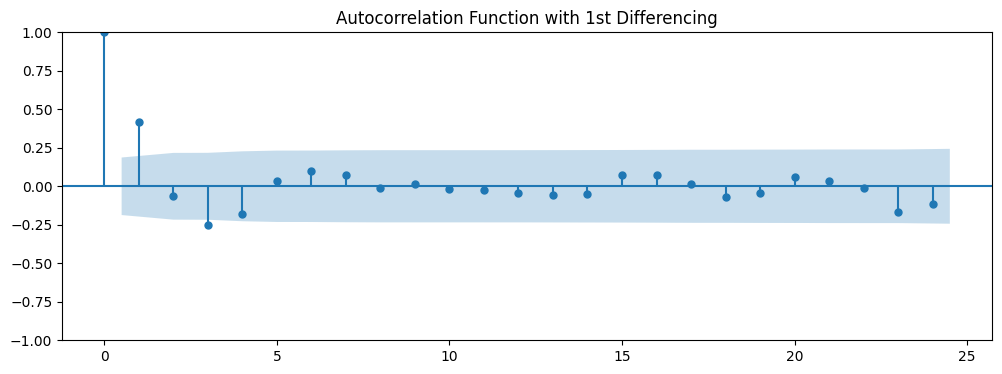

In [ ]:
# Differencing satu kali pada data 'ICP'
train['ICP_diff'] = train['ICP'].diff()

# Buat plot ACF dengan differencing 1 kali
fig, ax1 = plt.subplots(figsize=(12, 4))
acf = plot_acf(train['ICP_diff'].dropna(), lags=24, ax=ax1)
ax1.set_title('Autocorrelation Function with 1st Differencing')

plt.show()

In [ ]:
Signal = data['ICP'].to_numpy()
T = data.index.to_numpy()
from PyEMD import EEMD
eemd = EEMD()
eemd.noise_seed(42)
IMFs = eemd(Signal)
nIMFs = len(IMFs)
# Step 1: Hitung residual
residual = Signal - np.sum(IMFs, axis=0)

# Step 2: Tambahkan residual ke dalam eIMFs untuk mendapatkan IMF terakhir
eIMFs = np.vstack([IMFs, residual])

# Jumlah IMF termasuk residual
nIMFs = eIMFs.shape[0]

# menyimpan hasil dekomposisi
eIMFs_df = pd.DataFrame(eIMFs.T, columns=['eimf'+str(i+1) for i in range(nIMFs)])
hasil=pd.concat([eIMFs_df], axis=1)
hasil.to_csv('EEMD_result.csv', index=False)
hasil

,eimf1,eimf2,eimf3,eimf4,eimf5,eimf6,eimf7
0,-1.639853,2.791849,2.205793,14.074714,73.970337,79.347125,-54.839966
1,1.691015,4.771447,2.493788,14.159755,74.095578,79.244227,-54.285810
2,6.708601,5.852235,2.180893,14.160748,74.173962,79.138371,-54.074810
3,5.084131,3.847556,1.344845,14.089069,74.204393,79.029607,-52.969602
4,1.387315,-0.795907,0.216533,13.965191,74.185573,78.917983,-54.116689
...,...,...,...,...,...,...,...
133,1.376645,-7.434872,-5.911969,14.946156,58.189356,58.096843,-38.502157
134,-1.957123,-6.532397,-7.421906,14.740966,58.302983,58.009943,-39.122466
135,4.359117,-6.288056,-8.310778,14.478094,58.382476,57.925850,-38.916703
136,-2.327671,-6.551957,-8.596967,14.166595,58.427800,57.844600,-39.652400


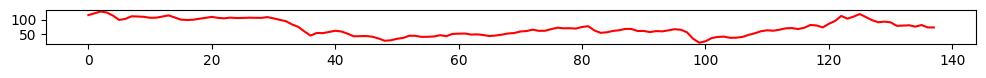

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+10, 1, 1)
plt.plot(T, Signal, 'r')

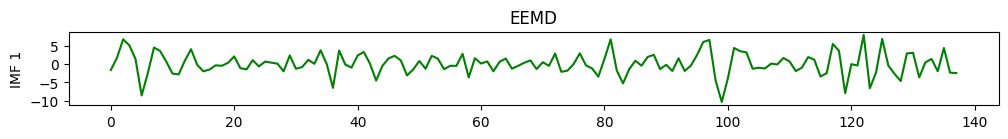

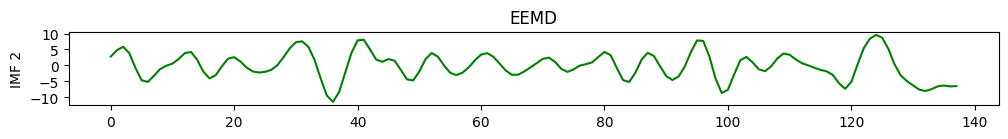

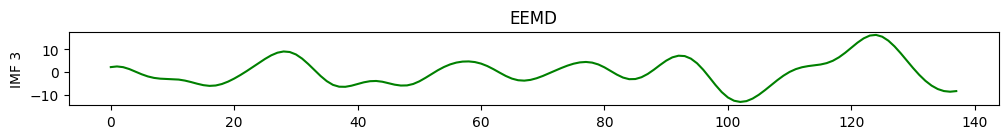

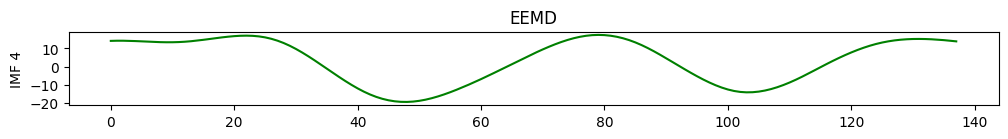

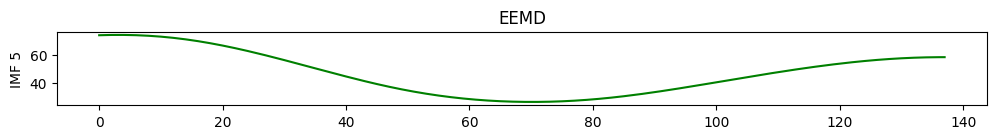

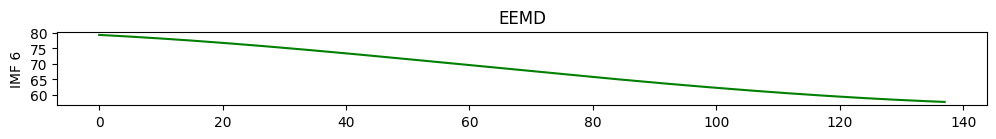

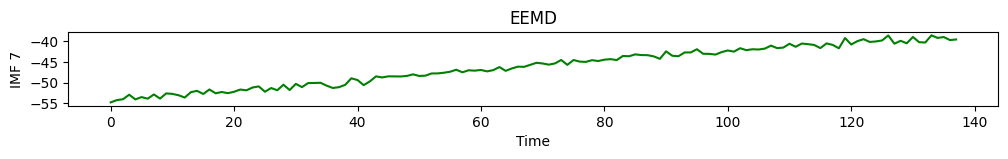

In [ ]:
for n in range(nIMFs):
  plt.figure(figsize=(12,9))
  plt.subplot(nIMFs+1, 1,2)
  plt.plot(T, eIMFs[n], 'g')
  plt.ylabel("IMF %i" %(n+1))
  plt.locator_params(axis='y', nbins=5)
  plt.title('EEMD')


plt.xlabel("Time")
plt.show()

In [ ]:
COBA= pd.read_csv('EEMD_result.csv')
COBA

,Date,eimf1,eimf2,eimf3,eimf4,eimf5,eimf6,eimf7,eimf8
0,1/1/2012,-1.483001,4.238840,3.869554,8.643160,70.514410,78.404403,78.709208,-126.986575
1,2/1/2012,0.065005,6.663766,4.130675,8.566321,70.723997,78.298203,78.568706,-124.846673
2,3/1/2012,5.154196,7.497044,3.687195,8.400300,70.872586,78.183897,78.425223,-124.080440
3,4/1/2012,1.436017,4.802797,2.670146,8.160418,70.958656,78.061509,78.278827,-119.738369
4,5/1/2012,2.772429,-0.876926,1.357021,7.872472,70.980801,77.931082,78.129582,-124.406461
...,...,...,...,...,...,...,...,...,...
133,2/1/2023,-1.652721,-0.527999,-12.975465,14.260397,52.530575,58.170726,57.196383,-86.241896
134,3/1/2023,-2.251228,-0.072696,-14.474030,13.762600,52.651525,58.151216,57.146711,-88.894098
135,4/1/2023,3.891046,-0.181826,-15.104466,13.304851,52.726263,58.132313,57.099856,-88.238038
136,5/1/2023,-0.488414,-0.767062,-14.921217,12.906154,52.754438,58.114030,57.055823,-91.343751


In [ ]:
data_imf1=COBA['eimf1'].values

In [ ]:
data_imf1

array([ -1.48300108,   0.06500508,   5.15419563,   1.43601679,
         2.77242931,  -7.39235991,   0.05245975,   2.90374243,
         4.33553772,  -2.0076954 ,  -4.16723147,  -3.07676148,
         2.66428551,   2.45883241,  -1.59902382,  -0.04113125,
        -2.48663824,   0.93064781,  -0.71769225,   0.87224889,
         1.93524642,  -2.15762798,  -0.94557426,   0.32781381,
        -2.05079217,   2.89241191,   0.47270132,   2.44886165,
        -3.80731819,   3.87862841,  -4.24180306,  -0.37630345,
         0.11030808,  -0.05296015,   3.03848253,   0.0519819 ,
        -5.2769372 ,   5.39244371,   1.82081254,  -2.91119586,
         0.31111447,   4.24611166,   0.06800815,  -5.93887128,
        -0.44492979,   0.80199034,   1.63256478,   0.66752236,
        -3.11768401,  -2.00335287,   1.28742098,  -1.67503807,
         0.54110312,   1.5771085 ,   0.31510838,   1.5614687 ,
         0.21377228,   4.80435104,  -3.79379552,   0.87378073,
        -1.32491671,   0.27704519,  -2.60706858,  -0.84

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
import matplotlib as mpl
import random

mpl.rcParams['figure.figsize'] = (7,4)
mpl.rcParams['axes.grid'] = False

# Tetapkan nilai acak untuk NumPy
np.random.seed(0)

# Tetapkan nilai acak untuk TensorFlow
random.seed(0)
tf.random.set_seed(0)

# **IMF 1**

In [ ]:
IMFs[0]

array([ -1.63985278,   1.69101487,   6.70860091,   5.08413116,
         1.3873153 ,  -8.51131943,  -2.46997288,   4.49382258,
         3.52435574,   0.62202037,  -2.5757893 ,  -2.8080535 ,
         0.91553441,   4.03038852,  -0.20280756,  -1.96866867,
        -1.4791599 ,  -0.34667985,  -0.46917861,   0.35193875,
         2.05911391,  -1.13496845,  -1.42735375,   1.05100273,
        -0.63502926,   0.66526752,   0.38211809,   0.11149951,
        -1.96440978,   2.33389633,  -1.27887051,  -0.80885001,
         1.13459057,   0.0752827 ,   3.74445528,  -0.04931513,
        -6.45813452,   3.65891658,  -0.13164807,  -0.97339975,
         2.32964907,   3.26986853,   0.09655763,  -4.47425641,
        -0.53708118,   1.53064348,   2.22750511,   0.97595355,
        -3.08763059,  -1.47312368,   0.83705156,  -1.27178422,
         2.22821076,   1.47701914,  -1.39363696,  -0.46582402,
        -0.4915    ,   2.76914805,  -3.60497044,   1.57287511,
         0.14241078,   0.70301729,  -1.95693621,   0.61

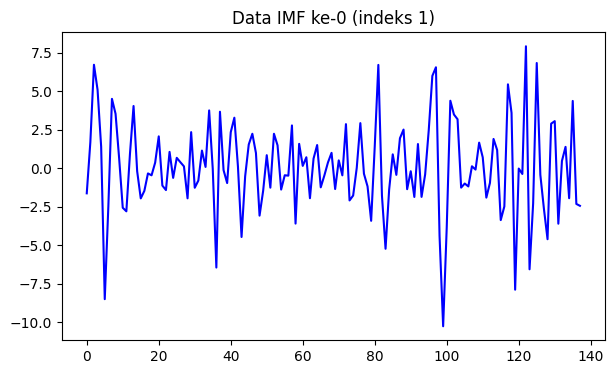

In [ ]:
# Memunculkan data IMF ke-1(indeks 0)
plt.figure()
plt.plot(IMFs[0], 'b')
plt.title('Data IMF ke-0 (indeks 1)')
plt.show()

In [ ]:
data_imf1 = IMFs[0]

In [ ]:
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_imf1_scaled = scaler.fit_transform(data_imf1.reshape(-1, 1))

In [ ]:
# Menentukan jumlah time steps (lag) untuk data time series
time_steps = 5

In [ ]:
# Pembuatan dataset untuk LSTM
np.random.seed(0)
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
X, Y = create_dataset(data_imf1_scaled, look_back)

In [ ]:
# Reshape input untuk LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Bagi data menjadi training set dan testing set
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
# Membuat model LSTM
np.random.seed(0)
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Melatih model
np.random.seed(0)
model.fit(X1_train, y1_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
108/108 - 5s - loss: 0.0722 - 5s/epoch - 50ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0283 - 456ms/epoch - 4ms/step
Epoch 3/100
108/108 - 1s - loss: 0.0283 - 631ms/epoch - 6ms/step
Epoch 4/100
108/108 - 0s - loss: 0.0260 - 426ms/epoch - 4ms/step
Epoch 5/100
108/108 - 0s - loss: 0.0246 - 391ms/epoch - 4ms/step
Epoch 6/100
108/108 - 0s - loss: 0.0249 - 435ms/epoch - 4ms/step
Epoch 7/100
108/108 - 0s - loss: 0.0255 - 441ms/epoch - 4ms/step
Epoch 8/100
108/108 - 0s - loss: 0.0232 - 418ms/epoch - 4ms/step
Epoch 9/100
108/108 - 0s - loss: 0.0222 - 387ms/epoch - 4ms/step
Epoch 10/100
108/108 - 0s - loss: 0.0215 - 402ms/epoch - 4ms/step
Epoch 11/100
108/108 - 0s - loss: 0.0208 - 391ms/epoch - 4ms/step
Epoch 12/100
108/108 - 0s - loss: 0.0200 - 370ms/epoch - 3ms/step
Epoch 13/100
108/108 - 0s - loss: 0.0202 - 486ms/epoch - 5ms/step
Epoch 14/100
108/108 - 0s - loss: 0.0177 - 421ms/epoch - 4ms/step
Epoch 15/100
108/108 - 0s - loss: 0.0201 - 456ms/epoch - 4ms/step
Epoch 16/100
108/108 

In [ ]:
# Melakukan prediksi pada testing set
np.random.seed(0)
y1_pred = model.predict(X1_test)

1/1 [==============================] - 0s 439ms/step


In [ ]:
# Denormalisasi data
y1_test = scaler.inverse_transform(y1_test.reshape(-1, 1))
y1_pred = scaler.inverse_transform(y1_pred)

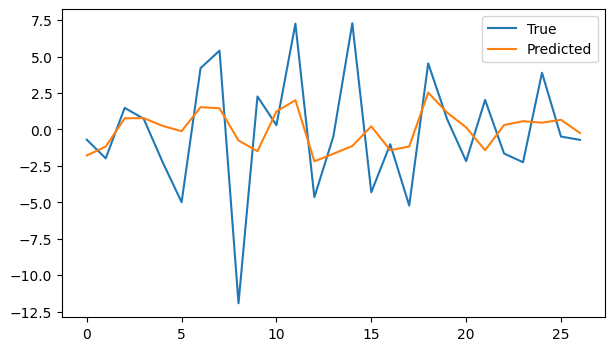

In [ ]:
# Plot hasil prediksi
plt.plot(y1_test, label='True')
plt.plot(y1_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y1_test, y1_pred)
mape = mean_absolute_percentage_error(y1_test, y1_pred)
rmse = np.sqrt(mse)

print("MSE: {:.2f}".format(mse))
print("MAPE: {:.2f}%".format(mape))
print("RMSE: {:.2f}".format(rmse))

MSE: 14.24
MAPE: 1.07%
RMSE: 3.77


In [ ]:
# Get the weights of the LSTM layers
lstm1_weights = model.layers[0].get_weights()[0]

In [ ]:
# Print the weights of forget gate, input gate, and output gate for each LSTM layer
print("Weights of LSTM Layer 1:")
print("Forget Gate Weights:", lstm1_weights[:, :32])
print("Input Gate Weights:", lstm1_weights[:, 32:64])
print("Output Gate Weights:", lstm1_weights[:, 64:])

Weights of LSTM Layer 1:
Forget Gate Weights: [[-0.19383389 -0.24928528  0.58480465 -0.2875705  -0.22205319 -0.28708366
  -0.16379906  0.01096885 -0.17962803 -0.21205196 -0.10903164  0.02754556
  -0.15859433 -0.1692653   0.08451706  0.55668956 -0.1716637   0.6420705
  -0.30493474 -0.29282826  0.52276576 -0.09770947 -0.05882217  0.4570356
  -0.16260587  0.00239622  0.27868652 -0.2246495  -0.15679736 -0.04574448
  -0.02300718 -0.17975707]]
Input Gate Weights: [[-0.288699   -0.19230029 -0.33188918 -0.01992445 -0.10297484 -0.0445921
  -0.06786708 -0.09072664 -0.10286178 -0.32498887 -0.09932692  0.4647832
  -0.15225591 -0.25103304 -0.06385373 -0.00774469 -0.27049327 -0.1363199
  -0.03248071 -0.02089231  0.02037714  0.04196439 -0.27049905 -0.02977927
  -0.17256944 -0.30302927 -0.26260743 -0.09461922 -0.2457474   0.01322834
   0.02960643 -0.01422141]]
Output Gate Weights: [[-0.65598047  0.17163107 -0.09895515  0.07420514 -0.14687483 -0.01810242
   0.09553234 -0.01963928 -0.25590268  0.0594607

In [ ]:
data1_imf=COBA['eimf1'].values
data1_imf

array([ -1.48300108,   0.06500508,   5.15419563,   1.43601679,
         2.77242931,  -7.39235991,   0.05245975,   2.90374243,
         4.33553772,  -2.0076954 ,  -4.16723147,  -3.07676148,
         2.66428551,   2.45883241,  -1.59902382,  -0.04113125,
        -2.48663824,   0.93064781,  -0.71769225,   0.87224889,
         1.93524642,  -2.15762798,  -0.94557426,   0.32781381,
        -2.05079217,   2.89241191,   0.47270132,   2.44886165,
        -3.80731819,   3.87862841,  -4.24180306,  -0.37630345,
         0.11030808,  -0.05296015,   3.03848253,   0.0519819 ,
        -5.2769372 ,   5.39244371,   1.82081254,  -2.91119586,
         0.31111447,   4.24611166,   0.06800815,  -5.93887128,
        -0.44492979,   0.80199034,   1.63256478,   0.66752236,
        -3.11768401,  -2.00335287,   1.28742098,  -1.67503807,
         0.54110312,   1.5771085 ,   0.31510838,   1.5614687 ,
         0.21377228,   4.80435104,  -3.79379552,   0.87378073,
        -1.32491671,   0.27704519,  -2.60706858,  -0.84

In [ ]:
# Find peaks (puncak) dan valleys (lembah)
from scipy.signal import argrelextrema
peaks_idx = argrelextrema(data1_imf, np.greater)[0]
valleys_idx = argrelextrema(data1_imf, np.less)[0]

In [ ]:
# Jumlah titik puncak dan lembah
num_peaks = len(peaks_idx)
num_valleys = len(valleys_idx)

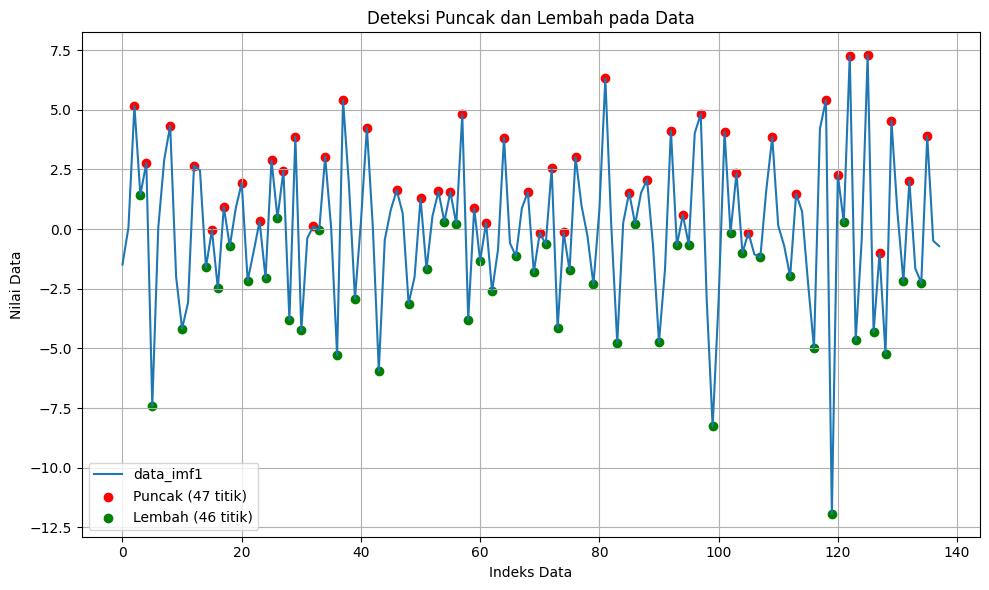

In [ ]:
# Plot data dan tandai puncak (merah) dan lembah (hijau)
plt.figure(figsize=(10, 6))
plt.plot(data1_imf, label='data_imf1')
plt.scatter(peaks_idx, data1_imf[peaks_idx], color='red', label=f'Puncak ({num_peaks} titik)')
plt.scatter(valleys_idx, data1_imf[valleys_idx], color='green', label=f'Lembah ({num_valleys} titik)')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai Data')
plt.title('Deteksi Puncak dan Lembah pada Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Fungsi untuk menghitung rataan periode
def mean_period(data1_imf):
    peaks_idx, valleys_idx = find_peaks_and_valleys(data1_imf)
    num_peaks = len(peaks_idx)
    num_valleys = len(valleys_idx)

    if num_peaks == num_valleys:
        period_sum = np.sum(valleys_idx - peaks_idx)
        mean_period = len(data1_imf) / period_sum
    else:
        period_sum = num_peaks + num_valleys
        mean_period = len(data1_imf) / period_sum

    return mean_period

In [ ]:
def mean_period(data1_imf):
    peaks_idx, _ = find_peaks(data1_imf)  # Find peaks in the data
    valleys_idx, _ = find_peaks(-data1_imf)  # Find valleys by finding peaks in the negated data

    num_peaks = len(peaks_idx)
    num_valleys = len(valleys_idx)

    if num_peaks == num_valleys:
        period_sum = np.sum(valleys_idx - peaks_idx)
        mean_period = len(data) / period_sum
    else:
        period_sum = num_peaks + num_valleys
        mean_period = len(data) / period_sum

    return mean_period

In [ ]:
dataasli=data['ICP'].values

In [ ]:
from scipy.signal import find_peaks
#Hitung rataan periode dari data
mean_period_value1 = mean_period(data1_imf)

# Hitung korelasi Pearson antara data asli dan IMF
correlation1 = np.corrcoef(dataasli, data1_imf)[0, 1]

# Hitung ragam dari data asli dan setiap IMF
var_dataasli = np.var(dataasli)
var_data1_imf = np.var(data1_imf)

# Hitung persentase rasio ragam dari setiap IMF terhadap ragam data asli
var_ratio1_imf = (var_data1_imf / var_dataasli) * 100

In [ ]:
print(f'Rataan Periode: {mean_period_value1:.4f}')
print(f'Korelasi Pearson: {correlation1:.4f}')
print(f'Ragam Data Asli: {var_dataasli:.4f}')
print(f'Ragam data_imf1: {var_data1_imf:.4f}, Persentase Rasio Ragam IMF 1: {var_ratio1_imf:.2f}%')

Rataan Periode: 1.4839
Korelasi Pearson: 0.1345
Ragam Data Asli: 702.8316
Ragam data_imf1: 9.1849, Persentase Rasio Ragam IMF 1: 1.31%


# **IMF 2**

In [ ]:
IMFs[1]

array([ 2.79184931e+00,  4.77144719e+00,  5.85223461e+00,  3.84755619e+00,
       -7.95906538e-01, -4.64772825e+00, -5.14981414e+00, -3.21685008e+00,
       -1.13703012e+00, -8.35469844e-02,  5.96847885e-01,  2.01406097e+00,
        3.86582322e+00,  4.22179018e+00,  1.78613835e+00, -1.95345714e+00,
       -4.04136424e+00, -3.04632752e+00, -2.55714533e-01,  2.10707824e+00,
        2.59628219e+00,  1.24462627e+00, -6.53799311e-01, -1.86774607e+00,
       -2.21606474e+00, -2.00392070e+00, -1.37732370e+00,  8.84898139e-02,
        2.58342053e+00,  5.37794471e+00,  7.28103434e+00,  7.55516357e+00,
        5.87084053e+00,  1.84341152e+00, -3.99510503e+00, -9.41247680e+00,
       -1.14172526e+01, -8.31131011e+00, -2.15442488e+00,  3.95030378e+00,
        7.86088670e+00,  8.03737242e+00,  5.04224466e+00,  1.86302915e+00,
        1.13897929e+00,  2.00811744e+00,  1.46933554e+00, -1.41230845e+00,
       -4.36749719e+00, -4.67618228e+00, -1.87886707e+00,  1.98832971e+00,
        3.88920548e+00,  

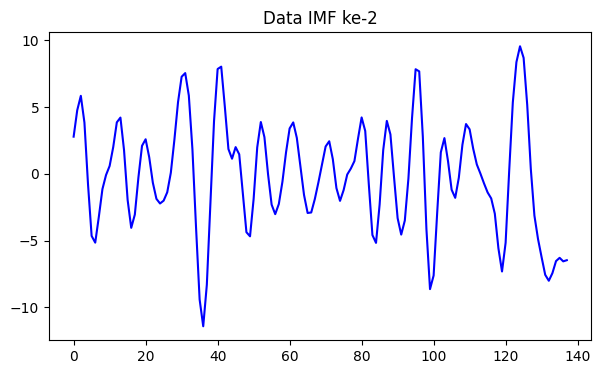

In [ ]:
# Memunculkan data IMF ke-2
plt.figure()
plt.plot(IMFs[1], 'b')
plt.title('Data IMF ke-2')
plt.show()

In [ ]:
data_imf2 = IMFs[1]

In [ ]:
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_imf2_scaled = scaler.fit_transform(data_imf2.reshape(-1, 1))

In [ ]:
# Pembuatan dataset untuk LSTM
np.random.seed(0)
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
X, Y = create_dataset(data_imf2_scaled, look_back)

In [ ]:
# Reshape input untuk LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Bagi data menjadi training set dan testing set
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
# Membuat model LSTM
tf.random.set_seed(0)
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Melatih model
np.random.seed(0)
model.fit(X2_train, y2_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
108/108 - 4s - loss: 0.1367 - 4s/epoch - 41ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0369 - 204ms/epoch - 2ms/step
Epoch 3/100
108/108 - 0s - loss: 0.0344 - 226ms/epoch - 2ms/step
Epoch 4/100
108/108 - 0s - loss: 0.0330 - 221ms/epoch - 2ms/step
Epoch 5/100
108/108 - 0s - loss: 0.0309 - 207ms/epoch - 2ms/step
Epoch 6/100
108/108 - 0s - loss: 0.0307 - 210ms/epoch - 2ms/step
Epoch 7/100
108/108 - 0s - loss: 0.0271 - 216ms/epoch - 2ms/step
Epoch 8/100
108/108 - 0s - loss: 0.0281 - 228ms/epoch - 2ms/step
Epoch 9/100
108/108 - 0s - loss: 0.0247 - 204ms/epoch - 2ms/step
Epoch 10/100
108/108 - 0s - loss: 0.0215 - 213ms/epoch - 2ms/step
Epoch 11/100
108/108 - 0s - loss: 0.0188 - 215ms/epoch - 2ms/step
Epoch 12/100
108/108 - 0s - loss: 0.0161 - 207ms/epoch - 2ms/step
Epoch 13/100
108/108 - 0s - loss: 0.0125 - 219ms/epoch - 2ms/step
Epoch 14/100
108/108 - 0s - loss: 0.0115 - 213ms/epoch - 2ms/step
Epoch 15/100
108/108 - 0s - loss: 0.0080 - 204ms/epoch - 2ms/step
Epoch 16/100
108/108 

In [ ]:
# Melakukan prediksi pada testing set
np.random.seed(0)
y2_pred = model.predict(X2_test)

1/1 [==============================] - 0s 442ms/step


In [ ]:
# Denormalisasi data
y2_test = scaler.inverse_transform(y2_test.reshape(-1, 1))
y2_pred = scaler.inverse_transform(y2_pred)

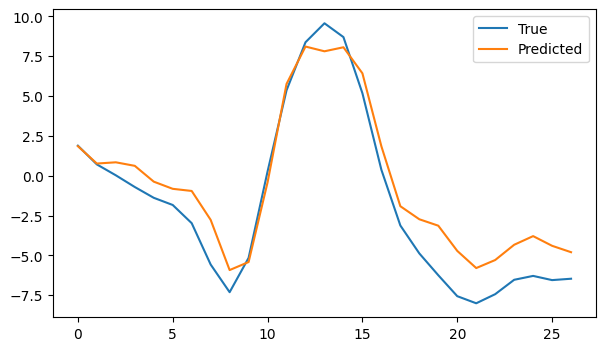

In [ ]:
# Plot hasil prediksi
plt.plot(y2_test, label='True')
plt.plot(y2_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y2_test, y2_pred)
mape = mean_absolute_percentage_error(y2_test, y2_pred)
rmse = np.sqrt(mse)
print("MSE: {:.2f}".format(mse))
print("MAPE: {:.2f}%".format(mape))
print("RMSE: {:.2f}".format(rmse))

MSE: 2.89
MAPE: 1.77%
RMSE: 1.70


In [ ]:
# Get the weights of the LSTM layers
lstm2_weights = model.layers[0].get_weights()[0]

In [ ]:
# Print the weights of forget gate, input gate, and output gate for each LSTM layer
print("Weights of LSTM Layer 1:")
print("Forget Gate Weights:", lstm2_weights[:, :32])
print("Input Gate Weights:", lstm2_weights[:, 32:64])
print("Output Gate Weights:", lstm2_weights[:, 64:])

Weights of LSTM Layer 1:
Forget Gate Weights: [[ 0.10461907  0.33033764 -0.02136132 -0.18048194 -0.17517896 -0.1474462
   0.37454307 -0.28624648  0.201029   -0.0107926  -0.27560905  0.04570296
   0.12810972 -0.06696507 -0.04346897  0.23608425 -0.01122494  0.07744023
  -0.15849803 -0.25556922 -0.43426573 -0.06950419  0.33093587 -0.22684936
  -0.27383706  0.19270717 -0.08437073  0.06731369 -0.3048261  -0.07050589
   0.1041525  -0.3580639 ]]
Input Gate Weights: [[-0.1533107  -0.49592692 -0.20919457  0.30182353 -0.07051107  0.23221391
  -0.2387451   0.08471215 -0.22991662 -0.29633802  0.20511037  0.04973965
  -0.07396054 -0.26912206  0.03024539  0.05308196 -0.06284387  0.18769582
   0.22744803  0.39048958  0.12349483 -0.09263451  0.06569657  0.17433056
   0.38101053  0.05220772  0.25023615  0.36601132 -0.23496683  0.33041722
   0.4354559   0.26668322]]
Output Gate Weights: [[ 1.91987485e-01  4.46813673e-01  2.10646763e-01  2.31262475e-01
   2.23800570e-01  2.25909963e-01  8.54615271e-02 -1

# **IMF 3**

In [ ]:
IMFs[2]

array([  2.20579322,   2.49378762,   2.18089318,   1.3448451 ,
         0.2165333 ,  -0.94002568,  -1.8904548 ,  -2.53116864,
        -2.8703498 ,  -2.98775748,  -3.0567063 ,  -3.26747848,
        -3.70943428,  -4.35581304,  -5.09060997,  -5.72019782,
        -6.03410018,  -5.87002189,  -5.2208703 ,  -4.17143907,
        -2.82518556,  -1.27356206,   0.41768616,   2.20217809,
         4.03110892,   5.80752821,   7.37388095,   8.52622677,
         9.06309416,   8.82737964,   7.76141989,   5.93647724,
         3.55228003,   0.90222724,  -1.70379546,  -3.96528579,
        -5.59315331,  -6.39493644,  -6.44163841,  -5.95437269,
        -5.20689587,  -4.47296172,  -3.98437989,  -3.88230192,
        -4.21513786,  -4.85681608,  -5.50683778,  -5.88842677,
        -5.82842511,  -5.20668118,  -4.03676128,  -2.49537342,
        -0.80320579,   0.83209028,   2.2655397 ,   3.40359235,
         4.1923826 ,   4.62059512,   4.69951857,   4.41547497,
         3.7406164 ,   2.67815688,   1.30678773,  -0.21

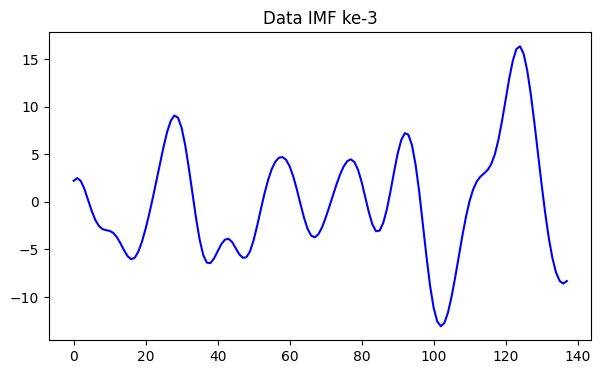

In [ ]:
# Memunculkan data IMF ke-3
plt.figure()
plt.plot(IMFs[2], 'b')
plt.title('Data IMF ke-3')
plt.show()

In [ ]:
data_imf3 = IMFs[2]

In [ ]:
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_imf3_scaled = scaler.fit_transform(data_imf3.reshape(-1, 1))

In [ ]:
# Pembuatan dataset untuk LSTM
np.random.seed(0)
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
X, Y = create_dataset(data_imf3_scaled, look_back)

In [ ]:
# Reshape input untuk LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Bagi data menjadi training set dan testing set
X3_train, X3_test, y3_train, y3_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model LSTM
np.random.seed(0)
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Melatih model
np.random.seed(0)
model.fit(X3_train, y3_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
108/108 - 2s - loss: 0.0690 - 2s/epoch - 18ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0164 - 239ms/epoch - 2ms/step
Epoch 3/100
108/108 - 0s - loss: 0.0138 - 209ms/epoch - 2ms/step
Epoch 4/100
108/108 - 0s - loss: 0.0126 - 210ms/epoch - 2ms/step
Epoch 5/100
108/108 - 0s - loss: 0.0127 - 208ms/epoch - 2ms/step
Epoch 6/100
108/108 - 0s - loss: 0.0114 - 226ms/epoch - 2ms/step
Epoch 7/100
108/108 - 0s - loss: 0.0110 - 206ms/epoch - 2ms/step
Epoch 8/100
108/108 - 0s - loss: 0.0107 - 215ms/epoch - 2ms/step
Epoch 9/100
108/108 - 0s - loss: 0.0100 - 217ms/epoch - 2ms/step
Epoch 10/100
108/108 - 0s - loss: 0.0096 - 208ms/epoch - 2ms/step
Epoch 11/100
108/108 - 0s - loss: 0.0095 - 226ms/epoch - 2ms/step
Epoch 12/100
108/108 - 0s - loss: 0.0105 - 206ms/epoch - 2ms/step
Epoch 13/100
108/108 - 0s - loss: 0.0090 - 213ms/epoch - 2ms/step
Epoch 14/100
108/108 - 0s - loss: 0.0086 - 217ms/epoch - 2ms/step
Epoch 15/100
108/108 - 0s - loss: 0.0089 - 208ms/epoch - 2ms/step
Epoch 16/100
108/108 

In [ ]:
# Melakukan prediksi pada testing set
np.random.seed(0)
y3_pred = model.predict(X3_test)

1/1 [==============================] - 0s 286ms/step


In [ ]:
# Denormalisasi data
y3_test = scaler.inverse_transform(y3_test.reshape(-1, 1))
y3_pred = scaler.inverse_transform(y3_pred)

In [ ]:
y3_pred

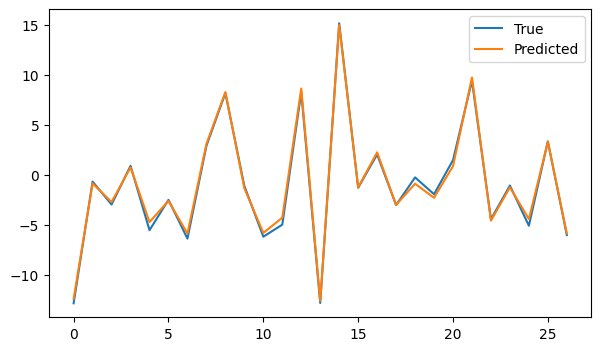

In [ ]:
# Plot hasil prediksi
plt.plot(y3_test, label='True')
plt.plot(y3_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y3_test, y3_pred)
mape = mean_absolute_percentage_error(y3_test, y3_pred)
rmse = np.sqrt(mse)
print("MSE: {:.2f}".format(mse))
print("MAPE: {:.2f}%".format(mape))
print("RMSE: {:.2f}".format(rmse))

MSE: 0.14
MAPE: 0.18%
RMSE: 0.37


In [ ]:
# Get the weights of the LSTM layers
lstm3_weights = model.layers[0].get_weights()[0]

In [ ]:
# Print the weights of forget gate, input gate, and output gate for each LSTM layer
print("Weights of LSTM Layer 1:")
print("Forget Gate Weights:", lstm3_weights[:, :32])
print("Input Gate Weights:", lstm3_weights[:, 32:64])
print("Output Gate Weights:", lstm3_weights[:, 64:])

Weights of LSTM Layer 1:
Forget Gate Weights: [[ 0.17518358  0.03796102  0.23526362 -0.05452094  0.25583827  0.2527456
  -0.02135916 -0.09406123  0.21431059 -0.00977544  0.14930543  0.3895227
  -0.25260425 -0.02650705 -0.05947763 -0.07480776  0.2287644  -0.23647267
  -0.1761054  -0.02181003  0.1089875   0.02359105 -0.04011139  0.03351945
   0.08676798 -0.08166957  0.11001024 -0.34735236  0.11833438  0.3363575
  -0.11515125  0.04108793]]
Input Gate Weights: [[ 1.20473616e-01  2.37534806e-01  2.14105169e-03 -1.03320412e-01
   1.42132312e-01 -8.31284225e-02 -3.51620314e-04  5.78781515e-02
  -3.16944649e-03  1.54577091e-01 -2.12839484e-01 -1.90043859e-02
   1.64509237e-01  3.85157257e-01  2.66659230e-01  1.04070030e-01
  -1.41482815e-01  1.03311568e-01  3.33993584e-01  3.55554521e-01
   3.28061730e-01 -1.06362574e-01  2.78734833e-01  4.70831603e-01
   1.00553170e-01 -1.34296611e-01  1.39836743e-01  2.09904477e-01
   5.24538830e-02  5.31032383e-01 -1.97692052e-01  1.75941940e-02]]
Output Ga

# **IMF 4**

In [ ]:
np.random.seed(0)
IMFs[3]

array([ 19.19480036,  19.42170456,  19.58367956,  19.68493277,
        19.73825445,  19.75808485,  19.75895607,  19.75517929,
        19.76021595,  19.78588201,  19.84166547,  19.93443907,
        20.06611114,  20.23163549,  20.41901358,  20.61258968,
        20.79448601,  20.94551548,  21.04555659,  21.0735957 ,
        21.00726679,  20.82340599,  20.49884812,  20.01184354,
        19.34320827,  18.47756489,  17.40479209,  16.12114867,
        14.63014547,  12.94284919,  11.08015831,   9.0709023 ,
         6.94660013,   4.73912697,   2.48037048,   0.20223102,
        -2.06332561,  -4.28463116,  -6.43163578,  -8.47539335,
       -10.38751142, -12.13966479, -13.70507097, -15.06225643,
       -16.19693642, -17.10363029, -17.7811859 , -18.22968919,
       -18.44995504, -18.44501099, -18.22360822, -17.80051938,
       -17.19324209, -16.41999616, -15.49927826, -14.44990809,
       -13.28990666, -12.03528832, -10.69894999,  -9.28931562,
        -7.81118171,  -6.26946352,  -4.67236576,  -3.03

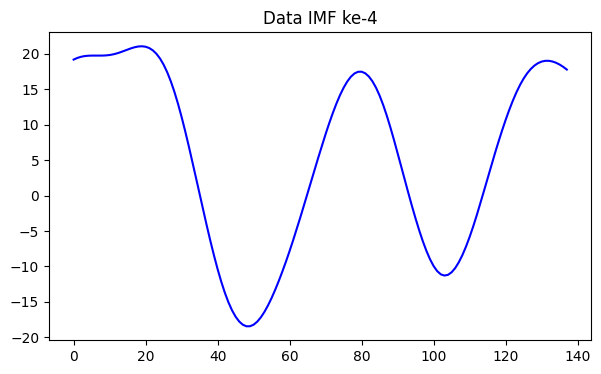

In [ ]:
# Memunculkan data IMF ke-4
plt.figure()
plt.plot(IMFs[3], 'b')
plt.title('Data IMF ke-4')
plt.show()

In [ ]:
data_imf4 = IMFs[3]

In [ ]:
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_imf4_scaled = scaler.fit_transform(data_imf4.reshape(-1, 1))

In [ ]:
# Pembuatan dataset untuk LSTM
np.random.seed(0)
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
X, Y = create_dataset(data_imf4_scaled, look_back)

In [ ]:
# Reshape input untuk LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Bagi data menjadi training set dan testing set
X4_train, X4_test, y4_train, y4_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model LSTM
np.random.seed(0)
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Melatih model
np.random.seed(0)
model.fit(X4_train, y4_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
108/108 - 1s - loss: 0.0667 - 1s/epoch - 13ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0071 - 150ms/epoch - 1ms/step
Epoch 3/100
108/108 - 0s - loss: 0.0054 - 155ms/epoch - 1ms/step
Epoch 4/100
108/108 - 0s - loss: 0.0056 - 150ms/epoch - 1ms/step
Epoch 5/100
108/108 - 0s - loss: 0.0054 - 146ms/epoch - 1ms/step
Epoch 6/100
108/108 - 0s - loss: 0.0049 - 174ms/epoch - 2ms/step
Epoch 7/100
108/108 - 0s - loss: 0.0051 - 161ms/epoch - 1ms/step
Epoch 8/100
108/108 - 0s - loss: 0.0052 - 154ms/epoch - 1ms/step
Epoch 9/100
108/108 - 0s - loss: 0.0053 - 158ms/epoch - 1ms/step
Epoch 10/100
108/108 - 0s - loss: 0.0049 - 142ms/epoch - 1ms/step
Epoch 11/100
108/108 - 0s - loss: 0.0045 - 152ms/epoch - 1ms/step
Epoch 12/100
108/108 - 0s - loss: 0.0048 - 152ms/epoch - 1ms/step
Epoch 13/100
108/108 - 0s - loss: 0.0045 - 157ms/epoch - 1ms/step
Epoch 14/100
108/108 - 0s - loss: 0.0050 - 156ms/epoch - 1ms/step
Epoch 15/100
108/108 - 0s - loss: 0.0047 - 153ms/epoch - 1ms/step
Epoch 16/100
108/108 

In [ ]:
# Melakukan prediksi pada testing set
np.random.seed(0)
y4_pred = model.predict(X4_test)

1/1 [==============================] - 0s 296ms/step


In [ ]:
# Denormalisasi data
y4_test = scaler.inverse_transform(y4_test.reshape(-1, 1))
y4_pred = scaler.inverse_transform(y4_pred)

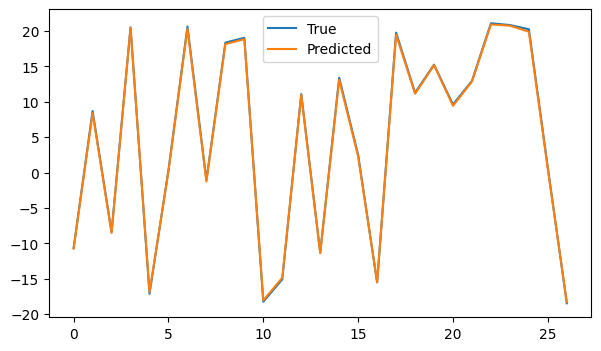

In [ ]:
# Plot hasil prediksi
plt.plot(y4_test, label='True')
plt.plot(y4_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y4_test, y4_pred)
mape = mean_absolute_percentage_error(y4_test, y4_pred)
rmse = np.sqrt(mse)
print("MSE: {:.2f}".format(mse))
print("MAPE: {:.2f}%".format(mape))
print("RMSE: {:.2f}".format(rmse))

MSE: 0.04
MAPE: 0.05%
RMSE: 0.20


In [ ]:
# Get the weights of the LSTM layers
lstm4_weights = model.layers[0].get_weights()[0]

In [ ]:
# Print the weights of forget gate, input gate, and output gate for each LSTM layer
print("Weights of LSTM Layer 1:")
print("Forget Gate Weights:", lstm4_weights[:, :32])
print("Input Gate Weights:", lstm4_weights[:, 32:64])
print("Output Gate Weights:", lstm4_weights[:, 64:])

Weights of LSTM Layer 1:
Forget Gate Weights: [[ 0.22142124 -0.03416787  0.38025376  0.05696323  0.02047661  0.05344651
   0.15295531  0.01270392 -0.03116991 -0.2683918   0.07871281  0.23271501
   0.09309808  0.24033079  0.00896137  0.04833417 -0.02817428  0.09393574
  -0.11368619 -0.02048161  0.10601892  0.36432725  0.02315442  0.11582698
  -0.28098902  0.19033362  0.16794674 -0.0616975   0.09594654  0.10949905
  -0.020375    0.1610745 ]]
Input Gate Weights: [[ 0.00372069  0.28472918 -0.21446612  0.14232078  0.30596682 -0.32796282
  -0.01273487  0.00413344 -0.13633648  0.00783333  0.40404174  0.13395855
   0.03054465  0.29600367  0.1302535  -0.2550205  -0.03896649  0.1714168
   0.20513517  0.31374773  0.34041676 -0.01026617  0.004288    0.16222008
   0.279666   -0.11934675  0.1080638  -0.18210612  0.03781749  0.08612339
  -0.00701899  0.25406858]]
Output Gate Weights: [[ 0.3196678   0.2130932   0.14861238  0.25773293  0.07226032  0.05642447
   0.0122438   0.26526797 -0.20262499  0.099

# **IMF 5**

In [ ]:
np.random.seed(0)
IMFs[4]

array([74.68275664, 74.79339573, 74.86184194, 74.88718897, 74.86854226,
       74.80502167, 74.69572876, 74.53981207, 74.33657535, 74.08551311,
       73.7862997 , 73.43891194, 73.04357643, 72.60080705, 72.11137575,
       71.5763248 , 70.9970764 , 70.37532349, 69.71293177, 69.01185406,
       68.27414967, 67.50190073, 66.69716809, 65.86200214, 64.99846343,
       64.10863943, 63.19465823, 62.25870606, 61.30304004, 60.32995879,
       59.34176783, 58.3407727 , 57.32927895, 56.30959212, 55.28401775,
       54.25486137, 53.22442853, 52.19502477, 51.16895562, 50.14852663,
       49.13604335, 48.1338113 , 47.14413602, 46.16932307, 45.21167292,
       44.27345191, 43.35684756, 42.46394232, 41.59670447, 40.75695322,
       39.94624927, 39.16581532, 38.41655115, 37.69915877, 37.0141895 ,
       36.36204785, 35.74303424, 35.15734839, 34.60514631, 34.0865777 ,
       33.60179214, 33.15093923, 32.73416856, 32.35162972, 32.00347232,
       31.68984593, 31.4108986 , 31.16677209, 30.95760662, 30.78

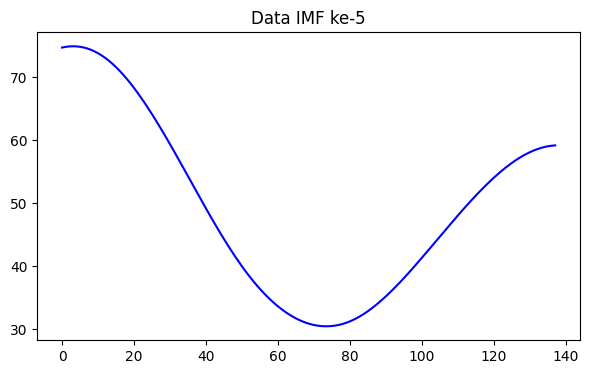

In [ ]:
# Memunculkan data IMF ke-5
plt.figure()
plt.plot(IMFs[4], 'b')
plt.title('Data IMF ke-5')
plt.show()

In [ ]:
data_imf5 = IMFs[4]

In [ ]:
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_imf5_scaled = scaler.fit_transform(data_imf5.reshape(-1, 1))

In [ ]:
# Pembuatan dataset untuk LSTM
np.random.seed(0)
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
X, Y = create_dataset(data_imf5_scaled, look_back)

In [ ]:
# Reshape input untuk LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Bagi data menjadi training set dan testing set
X5_train, X5_test, y5_train, y5_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model LSTM
np.random.seed(0)
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                10400     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Melatih model
np.random.seed(0)
model.fit(X5_train, y5_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
108/108 - 1s - loss: 0.0581 - 1s/epoch - 12ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0034 - 157ms/epoch - 1ms/step
Epoch 3/100
108/108 - 0s - loss: 0.0014 - 142ms/epoch - 1ms/step
Epoch 4/100
108/108 - 0s - loss: 0.0013 - 154ms/epoch - 1ms/step
Epoch 5/100
108/108 - 0s - loss: 0.0012 - 147ms/epoch - 1ms/step
Epoch 6/100
108/108 - 0s - loss: 0.0013 - 149ms/epoch - 1ms/step
Epoch 7/100
108/108 - 0s - loss: 0.0011 - 152ms/epoch - 1ms/step
Epoch 8/100
108/108 - 0s - loss: 0.0011 - 155ms/epoch - 1ms/step
Epoch 9/100
108/108 - 0s - loss: 0.0012 - 164ms/epoch - 2ms/step
Epoch 10/100
108/108 - 0s - loss: 9.8836e-04 - 165ms/epoch - 2ms/step
Epoch 11/100
108/108 - 0s - loss: 9.3409e-04 - 157ms/epoch - 1ms/step
Epoch 12/100
108/108 - 0s - loss: 0.0012 - 154ms/epoch - 1ms/step
Epoch 13/100
108/108 - 0s - loss: 0.0010 - 199ms/epoch - 2ms/step
Epoch 14/100
108/108 - 0s - loss: 0.0012 - 186ms/epoch - 2ms/step
Epoch 15/100
108/108 - 0s - loss: 9.0565e-04 - 196ms/epoch - 2ms/step
Epoch 16/

In [ ]:
# Melakukan prediksi pada testing set
np.random.seed(0)
y5_pred = model.predict(X5_test)

1/1 [==============================] - 0s 323ms/step


In [ ]:
# Denormalisasi data
y5_test = scaler.inverse_transform(y5_test.reshape(-1, 1))
y5_pred = scaler.inverse_transform(y5_pred)

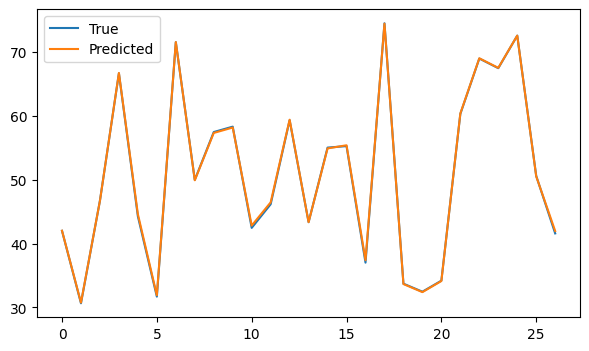

In [ ]:
# Plot hasil prediksi
plt.plot(y5_test, label='True')
plt.plot(y5_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y5_test, y5_pred)
mape = mean_absolute_percentage_error(y5_test, y5_pred)
rmse = np.sqrt(mse)
print("MSE: {:.2f}".format(mse))
print("MAPE: {:.2f}%".format(mape))
print("RMSE: {:.2f}".format(rmse))

MSE: 0.03
MAPE: 0.00%
RMSE: 0.17


In [ ]:
# Get the weights of the LSTM layers
lstm5_weights = model.layers[0].get_weights()[0]

In [ ]:
# Print the weights of forget gate, input gate, and output gate for each LSTM layer
print("Weights of LSTM Layer 1:")
print("Forget Gate Weights:", lstm5_weights[:, :32])
print("Input Gate Weights:", lstm5_weights[:, 32:64])
print("Output Gate Weights:", lstm5_weights[:, 64:])

Weights of LSTM Layer 1:
Forget Gate Weights: [[-0.2102036  -0.06635984  0.15907426  0.1053622   0.15412311 -0.04494001
  -0.30160028  0.05396765 -0.15773138  0.18069229  0.02607813  0.19694605
  -0.02070653 -0.03265012 -0.30236173  0.01185506 -0.24745613  0.3177341
   0.2214276  -0.09750114 -0.11864271  0.24239492 -0.2454142   0.20709006
  -0.06001051  0.04431513  0.42601252  0.15885456  0.06922846 -0.13148823
   0.24789177 -0.28329238]]
Input Gate Weights: [[-0.00584208  0.07038058  0.15890513  0.26618797 -0.12578642  0.25543016
  -0.06258857 -0.26939908 -0.27538413  0.00579862  0.1110256   0.12890959
   0.18237425  0.15557687  0.33751145  0.57302177 -0.08456055  0.09300707
   0.02619929  0.21465813  0.09013877 -0.06527333  0.12204356  0.01653366
  -0.10521539  0.20516247 -0.0164128   0.10572221  0.03767743 -0.04301859
   0.01718144  0.01915114]]
Output Gate Weights: [[-0.23427014  0.18005878 -0.2370315   0.14232951  0.01660625  0.09443589
  -0.14906363  0.26099467 -0.5830181   0.239

# **IMF 6**

In [ ]:
np.random.seed(0)
IMFs[5]

array([76.32710404, 76.25229451, 76.17543502, 76.09655618, 76.01568861,
       75.93286292, 75.84810974, 75.76145967, 75.67294333, 75.58259133,
       75.4904343 , 75.39650285, 75.30082759, 75.20343914, 75.10436812,
       75.00364513, 74.9013008 , 74.79736574, 74.69187057, 74.58484591,
       74.47632236, 74.36633054, 74.25490107, 74.14206457, 74.02785165,
       73.91229292, 73.79541901, 73.67726053, 73.55784808, 73.4372123 ,
       73.31538379, 73.19239317, 73.06827105, 72.94304806, 72.8167548 ,
       72.68942189, 72.56107996, 72.4317596 , 72.30149144, 72.1703061 ,
       72.03823419, 71.90530632, 71.77155312, 71.63700519, 71.50169316,
       71.36564763, 71.22889922, 71.09147856, 70.95341625, 70.81474291,
       70.67548916, 70.5356856 , 70.39536287, 70.25455157, 70.11328231,
       69.97158572, 69.82949241, 69.687033  , 69.54423809, 69.40113831,
       69.25776428, 69.1141466 , 68.97031589, 68.82630277, 68.68213786,
       68.53785177, 68.39347511, 68.2490385 , 68.10457256, 67.96

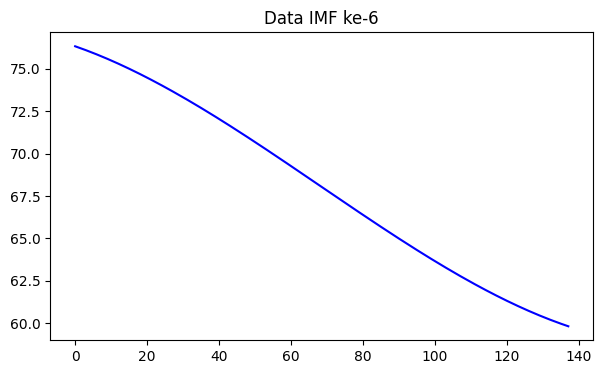

In [ ]:
# Memunculkan data IMF ke-6
plt.figure()
plt.plot(IMFs[5], 'b')
plt.title('Data IMF ke-6')
plt.show()

In [ ]:
data_imf6 = IMFs[5]

In [ ]:
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_imf6_scaled = scaler.fit_transform(data_imf6.reshape(-1, 1))

In [ ]:
# Pembuatan dataset untuk LSTM
np.random.seed(0)
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
X, Y = create_dataset(data_imf6_scaled, look_back)

In [ ]:
# Reshape input untuk LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Bagi data menjadi training set dan testing set
X6_train, X6_test, y6_train, y6_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model LSTM
np.random.seed(0)
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                10400     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Melatih model
np.random.seed(0)
model.fit(X6_train, y6_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
108/108 - 2s - loss: 0.0935 - 2s/epoch - 16ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0071 - 157ms/epoch - 1ms/step
Epoch 3/100
108/108 - 0s - loss: 7.6833e-04 - 169ms/epoch - 2ms/step
Epoch 4/100
108/108 - 0s - loss: 3.2724e-04 - 150ms/epoch - 1ms/step
Epoch 5/100
108/108 - 0s - loss: 2.7077e-04 - 166ms/epoch - 2ms/step
Epoch 6/100
108/108 - 0s - loss: 2.5872e-04 - 150ms/epoch - 1ms/step
Epoch 7/100
108/108 - 0s - loss: 1.7523e-04 - 159ms/epoch - 1ms/step
Epoch 8/100
108/108 - 0s - loss: 1.3526e-04 - 159ms/epoch - 1ms/step
Epoch 9/100
108/108 - 0s - loss: 1.1465e-04 - 169ms/epoch - 2ms/step
Epoch 10/100
108/108 - 0s - loss: 7.8830e-05 - 164ms/epoch - 2ms/step
Epoch 11/100
108/108 - 0s - loss: 6.4910e-05 - 166ms/epoch - 2ms/step
Epoch 12/100
108/108 - 0s - loss: 4.1132e-05 - 165ms/epoch - 2ms/step
Epoch 13/100
108/108 - 0s - loss: 2.4568e-05 - 171ms/epoch - 2ms/step
Epoch 14/100
108/108 - 0s - loss: 2.6929e-05 - 159ms/epoch - 1ms/step
Epoch 15/100
108/108 - 0s - loss: 1.073

In [ ]:
# Melakukan prediksi pada testing set
np.random.seed(0)
y6_pred = model.predict(X6_test)

1/1 [==============================] - 0s 288ms/step


In [ ]:
# Denormalisasi data
y6_test_denormalized = scaler.inverse_transform(y6_test.reshape(-1, 1))
y6_pred_denormalized = scaler.inverse_transform(y6_pred)

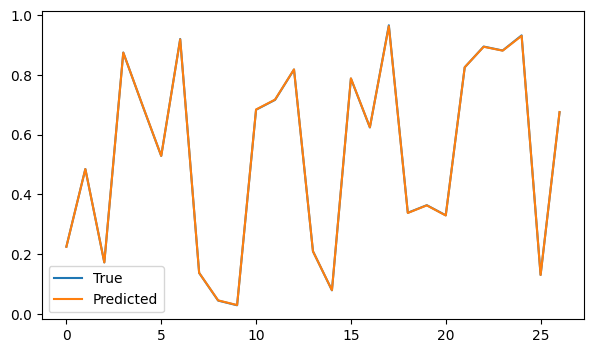

In [ ]:
# Plot hasil prediksi
plt.plot(y6_test, label='True')
plt.plot(y6_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y6_test, y6_pred)
mape = mean_absolute_percentage_error(y6_test, y6_pred)
rmse = np.sqrt(mse)
print("MSE: {:.2f}".format(mse))
print("MAPE: {:.2f}%".format(mape))
print("RMSE: {:.2f}".format(rmse))

MSE: 0.00
MAPE: 0.00%
RMSE: 0.00


# **IMF 7**

In [ ]:
np.random.seed(0)
IMFs[6]

array([77.57678977, 77.48316717, 77.38688315, 77.28798017, 77.18650071,
       77.08248723, 76.9759822 , 76.8670281 , 76.75566739, 76.64194254,
       76.52589602, 76.4075703 , 76.28700785, 76.16425113, 76.03934263,
       75.9123248 , 75.78324012, 75.65213105, 75.51904007, 75.38400964,
       75.24708224, 75.10830032, 74.96770637, 74.82534286, 74.68125224,
       74.53547699, 74.38805958, 74.23904248, 74.08846815, 73.93637908,
       73.78281772, 73.62782654, 73.47144802, 73.31372463, 73.15469882,
       72.99441309, 72.83290988, 72.67023167, 72.50642094, 72.34152014,
       72.17557175, 72.00861824, 71.84070208, 71.67186574, 71.50215168,
       71.33160238, 71.1602603 , 70.98816792, 70.8153677 , 70.64190212,
       70.46781363, 70.29314472, 70.11793785, 69.94223549, 69.7660801 ,
       69.58951417, 69.41258015, 69.23532052, 69.05777775, 68.8799943 ,
       68.70201265, 68.52387526, 68.3456246 , 68.16730315, 67.98895337,
       67.81061773, 67.63233871, 67.45415876, 67.27612036, 67.09

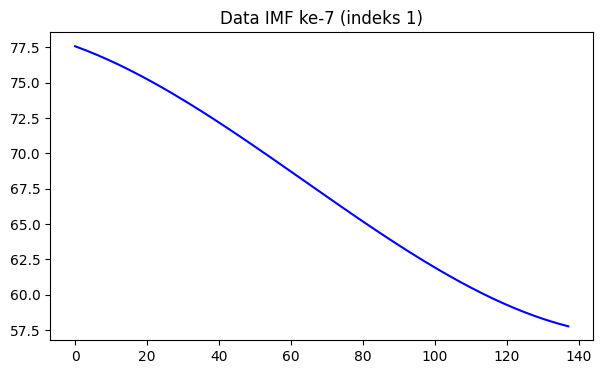

In [ ]:
# Memunculkan data IMF ke-7
plt.figure()
plt.plot(IMFs[6], 'b')
plt.title('Data IMF ke-7 (indeks 1)')
plt.show()

In [ ]:
data_imf7 = IMFs[6]

In [ ]:
# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_imf7_scaled = scaler.fit_transform(data_imf7.reshape(-1, 1))

In [ ]:
# Pembuatan dataset untuk LSTM
np.random.seed(0)
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
X, Y = create_dataset(data_imf7_scaled, look_back)

In [ ]:
# Reshape input untuk LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Bagi data menjadi training set dan testing set
X7_train, X7_test, y7_train, y7_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
# Membuat model LSTM
np.random.seed(0)
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 50)                10400     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Melatih model
np.random.seed(0)
model.fit(X7_train, y7_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
108/108 - 3s - loss: 0.0449 - 3s/epoch - 25ms/step
Epoch 2/100
108/108 - 0s - loss: 0.0025 - 232ms/epoch - 2ms/step
Epoch 3/100
108/108 - 0s - loss: 2.8788e-04 - 248ms/epoch - 2ms/step
Epoch 4/100
108/108 - 0s - loss: 9.2695e-05 - 250ms/epoch - 2ms/step
Epoch 5/100
108/108 - 0s - loss: 8.5460e-05 - 253ms/epoch - 2ms/step
Epoch 6/100
108/108 - 0s - loss: 9.0924e-05 - 242ms/epoch - 2ms/step
Epoch 7/100
108/108 - 0s - loss: 8.6279e-05 - 232ms/epoch - 2ms/step
Epoch 8/100
108/108 - 0s - loss: 6.8426e-05 - 243ms/epoch - 2ms/step
Epoch 9/100
108/108 - 0s - loss: 6.7151e-05 - 240ms/epoch - 2ms/step
Epoch 10/100
108/108 - 0s - loss: 8.1288e-05 - 252ms/epoch - 2ms/step
Epoch 11/100
108/108 - 0s - loss: 3.8149e-05 - 254ms/epoch - 2ms/step
Epoch 12/100
108/108 - 0s - loss: 5.3704e-05 - 252ms/epoch - 2ms/step
Epoch 13/100
108/108 - 0s - loss: 3.1826e-05 - 246ms/epoch - 2ms/step
Epoch 14/100
108/108 - 0s - loss: 2.5028e-05 - 253ms/epoch - 2ms/step
Epoch 15/100
108/108 - 0s - loss: 2.548

In [ ]:
# Melakukan prediksi pada testing set
np.random.seed(0)
y7_pred = model.predict(X7_test)

1/1 [==============================] - 2s 2s/step


In [ ]:
# Denormalisasi data
y7_test = scaler.inverse_transform(y7_test.reshape(-1, 1))
y7_pred = scaler.inverse_transform(y7_pred)

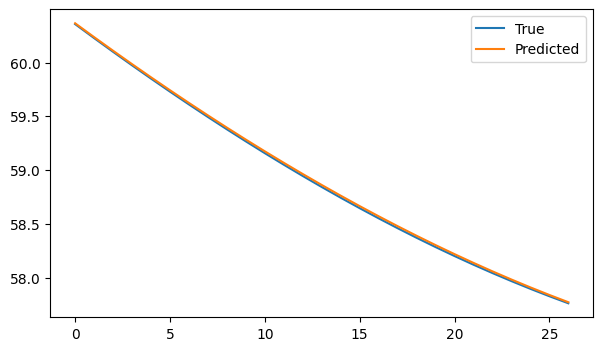

In [ ]:
# Plot hasil prediksi
plt.plot(y7_test, label='True')
plt.plot(y7_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y7_test, y7_pred)
mape = mean_absolute_percentage_error(y7_test, y7_pred)
rmse = np.sqrt(mse)

print("MSE: {:.2f}".format(mse))
print("MAPE: {:.2f}%".format(mape))
print("RMSE: {:.2f}".format(rmse))

MSE: 0.00
MAPE: 0.00%
RMSE: 0.02


# **Gabungan**

In [ ]:
ygabungan_pred = y1_pred + y2_pred + y3_pred + y4_pred + y5_pred + y6_pred
ygabungan_test = y1_test + y2_test + y3_test + y4_test + y5_test + y6_test

In [ ]:
combined_pred = np.concatenate((y1_pred, y2_pred, y3_pred, y4_pred, y5_pred), axis=0)

In [ ]:
combined_test = np.concatenate((y1_test, y2_test, y3_test, y4_test, y5_test), axis=0)

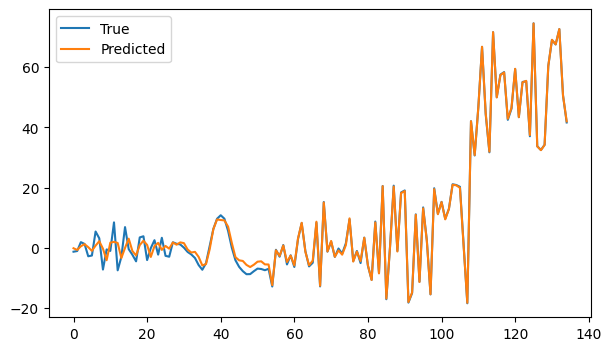

In [ ]:
# Plot hasil prediksi
plt.plot(combined_test, label='True')
plt.plot(combined_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(combined_test, combined_pred)
mape = mean_absolute_percentage_error(combined_test, combined_pred)
rmse = np.sqrt(mse)

print("MSE: {:.2f}".format(mse))
print("MAPE: {:.2f}%".format(mape))
print("RMSE: {:.2f}".format(rmse))

MSE: 3.54
MAPE: 1.28%
RMSE: 1.88


In [ ]:
import logging
import math

import numpy as np
from scipy import stats
from scipy.signal import find_peaks